<a href="https://colab.research.google.com/github/SohamSinghal/PythonProjects/blob/master/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

Independent variable - Input data(x)

Dependent Variable - Output or effect(y)

In [ ]:
data = pd.read_csv('Data.csv')
x = data.iloc[:,:-1].values #iloc - locate indexes,.values - store values
y = data.iloc[:,-1].values

In [ ]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [ ]:
from sklearn.impute import SimpleImputer #from sklearn.impute library we import SimpleImputer class
impute = SimpleImputer(missing_values = np.nan,strategy = 'mean') #impute is the obj of the class and missing value and startegy are the arguments passed
# strategy - what to do; missing_values - to which values to use the strategy
impute.fit(x[:,1:3]) #fit method performs the former "strategy" on the data
x[:,1:3] = impute.transform(x[:,1:3]) #transform method updates the original data with the processed data

In [ ]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


Training set - Data used to train the machine

Validation set - Fine tune the machine. It doenst learn anything from this unlike Training set

Test set - The sample of data used to provide an unbiased evaluation of a final machine.



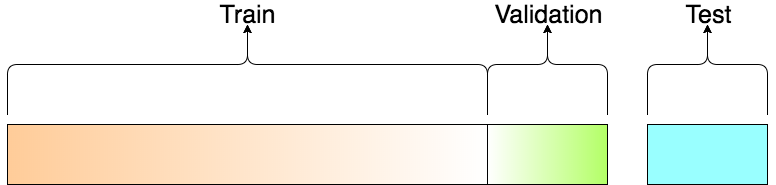

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [ ]:
print(x_train)

[[0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 35.0 58000.0]
 [1.0 0.0 0.0 48.0 79000.0]]


In [ ]:
print(y_train)

[1 1 0 0 0 1 1 1]


In [ ]:
print(x_test)

[[0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 50.0 83000.0]]


In [ ]:
print(y_test)

[0 0]


Feature Scaling - Normalizing the range of the independent variable for giving better predictions

There are 2 main methods of feature scaling:

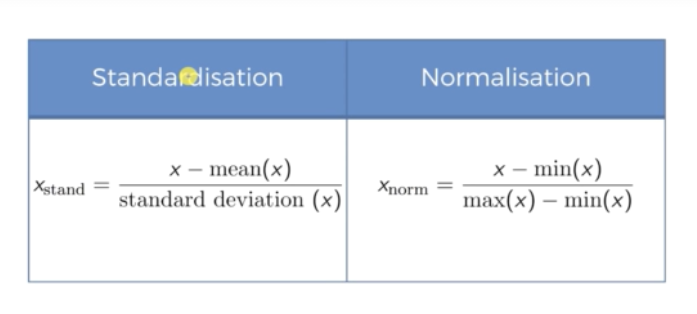

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[:,3:] = scaler.fit_transform(x_train[:,3:]) #fit_transforms computes and applies  
x_test[:,3:] = scaler.transform(x_test[:,3:]) #transform just applies;the scaling factor of previous step will be taken

In [ ]:
print(x_train)

[[0.0 1.0 0.0 0.3915762703288588 0.2065202954630813]
 [1.0 0.0 0.0 -0.07315161094055589 0.5302548126754777]
 [0.0 1.0 0.0 -1.1575166672358568 -0.7758465153883297]
 [0.0 0.0 1.0 0.2022426890709492 -0.9767851812443]
 [1.0 0.0 0.0 1.011213445354745 1.0326014773154035]
 [0.0 0.0 1.0 -1.6222445485052714 -1.3786625129562409]
 [1.0 0.0 0.0 -0.382970198453499 -0.373969183676389]
 [1.0 0.0 0.0 1.6308506203806312 1.7358868078113]]
